In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from arch import arch_model

In [2]:
#use csv data for now - will pull in data via yahoo finance conenction later
# Load S&P 500 data
sp_price = pd.read_csv('data/sp500.csv', index_col='Date', parse_dates=True)

In [3]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = round(100 * (sp_price['Close'].pct_change()),3)

sp_price['Return'].fillna(-0.324, inplace=True)  # Fill NaN values with 0

# View the data
print(sp_price.head(10))

              Close  Return
Date                       
2010-07-01  1027.37  -0.324
2010-07-02  1022.58  -0.466
2010-07-06  1028.06   0.536
2010-07-07  1060.27   3.133
2010-07-08  1070.24   0.940
2010-07-09  1077.96   0.721
2010-07-12  1078.75   0.073
2010-07-13  1095.34   1.538
2010-07-14  1095.17  -0.016
2010-07-15  1096.48   0.120


C:\Users\iantm\AppData\Local\Temp\ipykernel_30492\993486767.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp_price['Return'].fillna(-0.324, inplace=True)  # Fill NaN values with 0


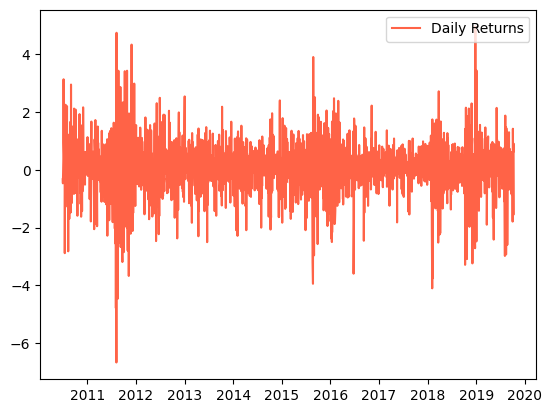

In [4]:
# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [5]:
# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

Daily volatility:  0.92%


In [6]:
# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Monthly volatility:  4.20%
Annual volatility:  14.54%


In [7]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_price['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.974691668893
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9592622164846
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.957540619865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.957540619117
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


In [8]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.92
Method:            Maximum Likelihood   BIC:                           5574.94
                                        No. Observations:                 2336
Date:                Wed, Jul 23 2025   Df Residuals:                     2335
Time:                        16:30:26   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.022e-08 [4.892e-0

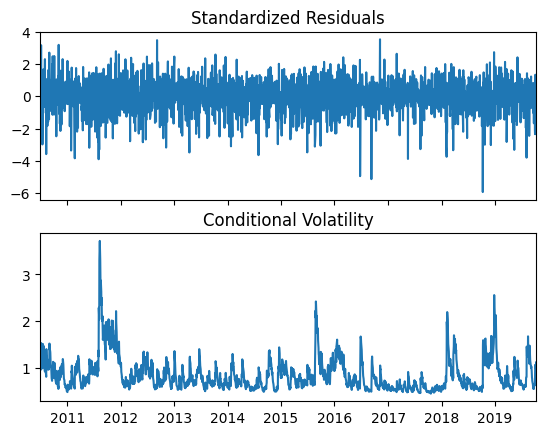

In [9]:
# Plot fitted results
gm_result.plot()
plt.show()

In [10]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994093  0.988383  0.982933  0.977731  0.972766


In [11]:
n_obs = len(gm_result.resid)
normal_resid = np.random.normal(0, 1, n_obs)

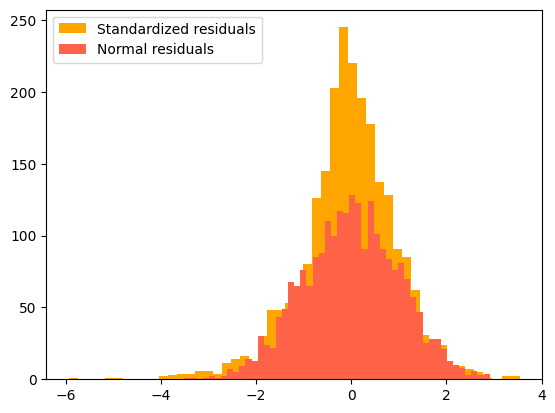

In [12]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
# --> How do I calcualte normal residuals??
plt.hist(normal_resid, bins = 50, 
         facecolor = 'tomato', label = 'Normal residuals')
plt.legend(loc = 'upper left')
plt.show()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 75920.69656570061
Iteration:      2,   Func. Count:     19,   Neg. LLF: 147132.009779891
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53654.018595957736
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5834.601863076637
Iteration:      5,   Func. Count:     46,   Neg. LLF: 91366.38800735444
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5414.987328616157
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4670.4165448850845
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2691.389576719199
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2691.454526137971
Iteration:     10,   Func. Count:     87,   Neg. LLF: 2690.018720316675
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2689.9930478913375
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2689.989445773767
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2689.988492661492
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2689.988

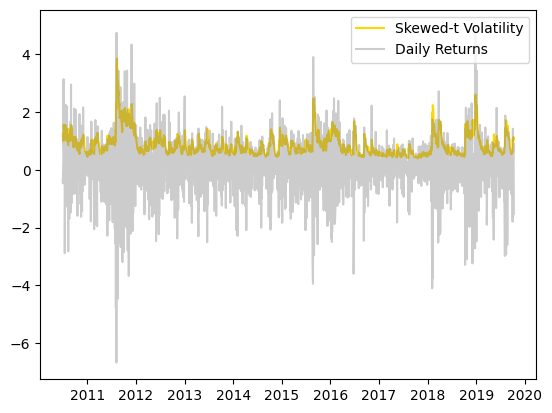

In [13]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_price['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
#plt.plot(normal_vol, color = 'red', label = 'Normal Volatility')
plt.plot(sp_price['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

Bitcoin Example For GJR-GARCH

In [14]:
#use csv data for now - will pull in data via yahoo finance conenction later
# Load S&P 500 data
bitcoin_data = pd.read_csv('data/bitcoin.csv', index_col='Date', parse_dates=True)

<Axes: xlabel='Date'>

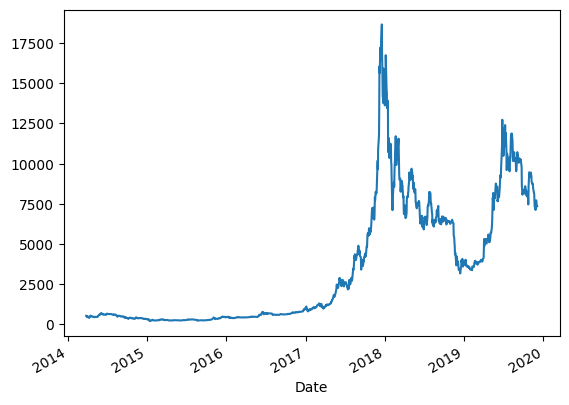

In [15]:
bitcoin_data['Close'].plot()

In [16]:
# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Wed, Jul 23 2025   Df Residuals:                     1482
Time:                              16:30:27   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

RUN EGARCH

In [17]:
# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o =1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Wed, Jul 23 2025   Df Residuals:                     1482
Time:                              16:30:27   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [18]:
gjrgm_vol = gjrgm_result.conditional_volatility

In [19]:
gjrgm_vol

Date
2014-03-27    6.745410
2014-03-28    7.035872
2014-03-31    6.635745
2014-04-01    6.800033
2014-04-02    6.490952
                ...   
2019-11-27    3.426307
2019-11-28    3.889182
2019-11-29    3.673666
2019-12-02    3.531162
2019-12-03    3.820325
Name: cond_vol, Length: 1483, dtype: float64

In [20]:
egarch_vol = egarch_result.conditional_volatility

In [21]:
egarch_vol

Date
2014-03-27    7.216885
2014-03-28    8.376907
2014-03-31    7.901338
2014-04-01    8.725547
2014-04-02    8.538683
                ...   
2019-11-27    5.156918
2019-11-28    6.086723
2019-11-29    5.499321
2019-12-02    5.350325
2019-12-03    5.951289
Name: cond_vol, Length: 1483, dtype: float64

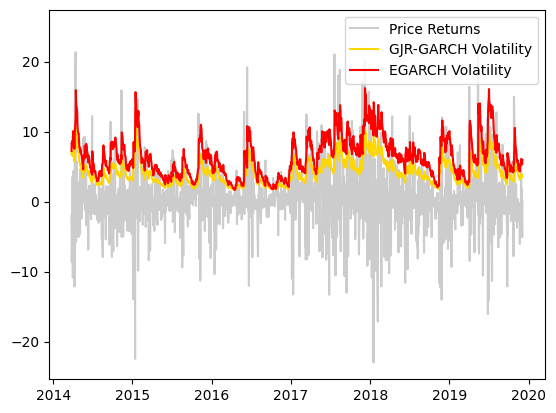

In [22]:
# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

Fixed Window Rolling Forecast

In [23]:
start_loc = 2081
end_loc = 2201

In [24]:
forecasts = {}
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast 
    temp_result = gm_result.forecast(horizon = 1).variance
    # Get the last available forecast value and its date
    fcast = temp_result.iloc[1,:]
    forecasts[fcast.name] = fcast
# Save all forecast to a DataFrame   
forecast_var = pd.DataFrame(forecasts).T

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34015496898166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.3230070703322
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.15370304102197
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.12986296559944
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 186.10703011086196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.1018426213027
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     35,   Neg. LLF: 279.00221386312444
Iteration:     10,   Func. Count:     62,   Neg. LLF: 184.99003773414827
Optimization 

In [25]:
variance_fixedwin = forecast_var

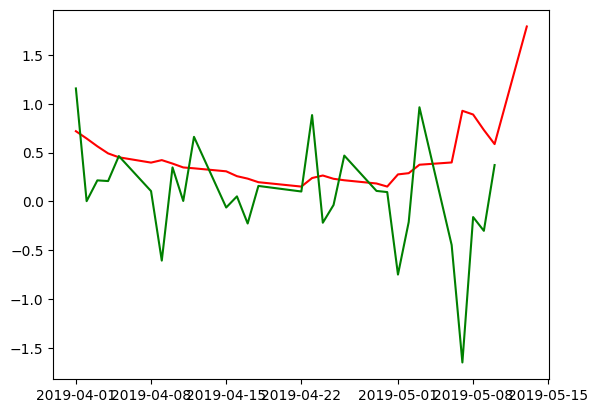

In [26]:
# Plot the forecast variance
plt.plot(variance_fixedwin, color = 'red')
plt.plot(sp_price.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()

Expanding Window Forecast

In [27]:
forecasts = {}
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast 
    temp_result = gm_result.forecast(horizon = 1).variance
    # Get the last available forecast value and its date
    fcast = temp_result.iloc[1,:]
    forecasts[fcast.name] = fcast
# Save all forecast to a DataFrame   
forecasts_var = pd.DataFrame(forecasts).T

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34015496898166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.3230070703322
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 189.14897722888324
Optimization terminated successfully    (Exit mode 0)
            Current function value: 188.91094291166988
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 189.8842392395592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 189.66956107423948
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 190.75238371968413
Optimization terminated successfully    (Exit mode 0)
            Current function val

In [28]:
variance_expandwin = forecasts_var

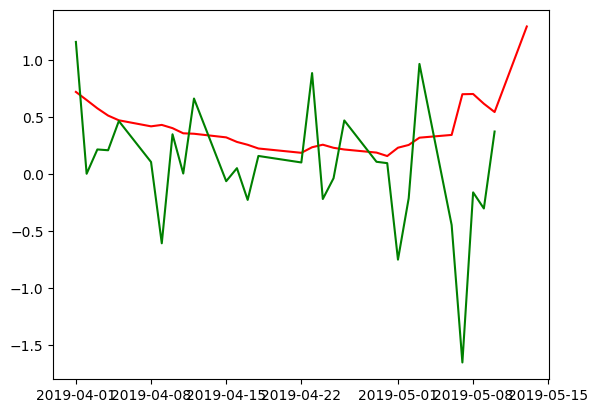

In [29]:
# Plot the forecast variance
plt.plot(variance_expandwin, color = 'red')
plt.plot(sp_price.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()

In [30]:
# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)
# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)


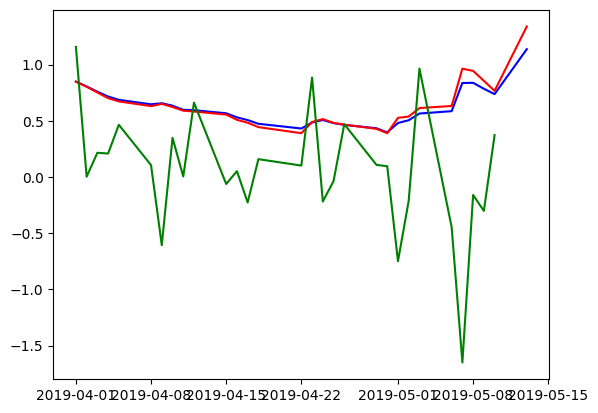

In [32]:

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue')
# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red')

plt.plot(sp_price.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()